In [ ]:
import pandas as pd  # Pandas digunakan untuk manipulasi data
import numpy as np  # NumPy digunakan untuk operasi numerik
import matplotlib.pyplot as plt  # Matplotlib digunakan untuk plotting dasar
import seaborn as sns  # Seaborn digunakan untuk visualisasi data statistik

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_hotel = pd.read_csv("/content/drive/MyDrive/RevoU/hotel_bookings.csv")

In [ ]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df_hotel.shape #digunakan untuk mendapatkan dimensi (jumlah baris dan kolom) dari suatu DataFrame yang disimpan dalam variabel df_hotel

(119390, 32)

In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Menggunakan df_hotel.columns untuk mendapatkan daftar kolom dari DataFrame df_hotel
# Ini akan mengembalikan daftar nama-nama kolom yang ada dalam DataFrame tersebut.
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# **EDA**

In [ ]:
df_hotel.duplicated().sum()

31994

In [ ]:
#Cek dataframe hasil penghapusan
df_hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

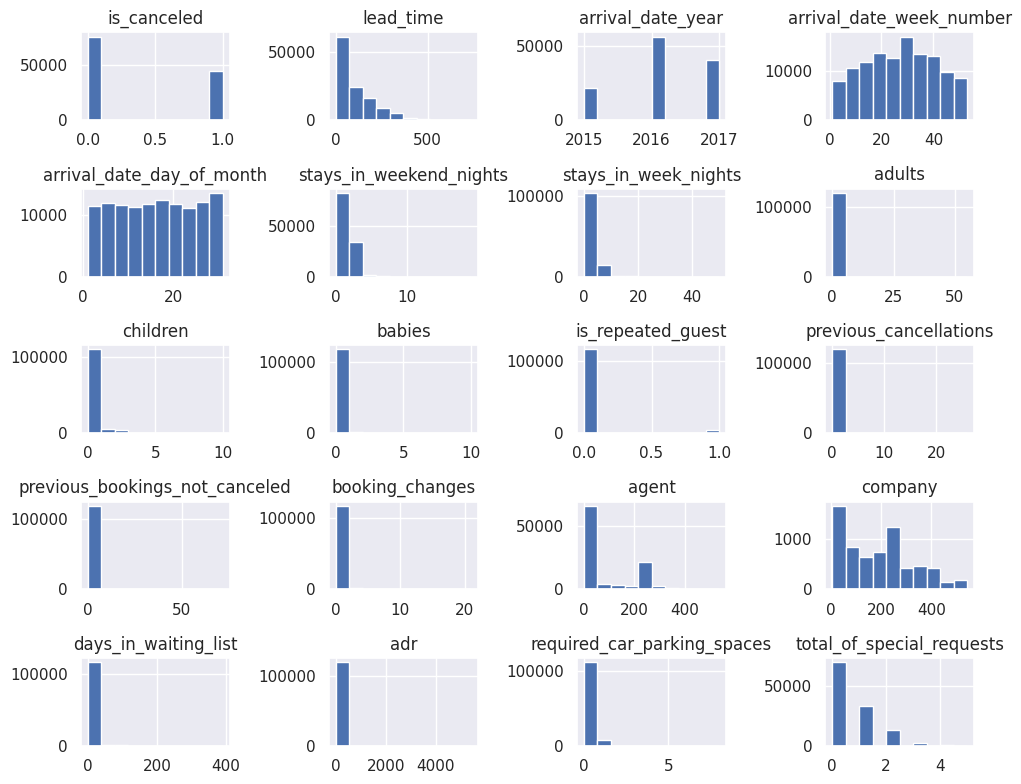

In [ ]:
# Create histograms for all numerical columns
df_hotel.hist(figsize=(10, 8))  # Adjust figsize as needed
plt.tight_layout()  # Improve spacing between subplots
plt.show()

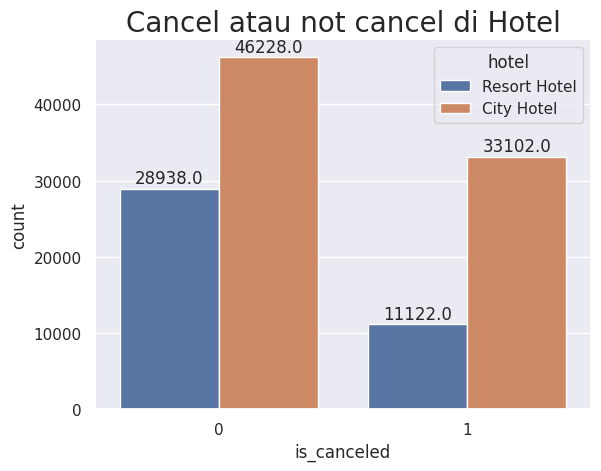

In [ ]:
# Membuat plot untuk membandingkan pembatalan di dua jenis hotel
plt.title("Cancel atau not cancel di Hotel", fontdict={'fontsize': 20})

# Membuat countplot menggunakan seaborn
ax = sns.countplot(x="is_canceled", hue='hotel', data=df_hotel) #Countplot digunakan untuk menghitung dan membandingkan jumlah pembatalan (is_canceled)
                                                                #di dua jenis hotel (hotel) yang ada dalam dataframe df_hotel.

# Menambahkan label pada setiap batang bar
for p in ax.patches:
    # Menggunakan f-string untuk menampilkan tinggi (jumlah) dari setiap batang bar
    label_text = f'{p.get_height()}' #f'{p.get_height()}' adalah penggunaan f-string dalam Python untuk mengubah nilai p.get_height()
                                     #menjadi string dan menyimpannya dalam variabel label_text.

    # Mengatur posisi label di tengah-tengah batang bar dengan koordinat x dan y
    x_pos = p.get_x() + p.get_width() / 2.  # Posisi x ditengah batang
    y_pos = p.get_height()  # Posisi y di atas batang

    # Menentukan horisontal alignment (ha) ke 'center' dan vertical alignment (va) ke 'bottom'
    horizontal_alignment = 'center'
    vertical_alignment = 'bottom'

    # Menentukan posisi xytext dan textcoords untuk menambahkan jarak dan mengatur koordinat teks
    xytext = (0, 1)  # Menggeser teks 0 satuan ke kanan dan 1 satuan ke atas
    text_coords = 'offset points'

    # Menggunakan ax.annotate untuk menambahkan label pada batang bar
    ax.annotate(label_text, (x_pos, y_pos), ha=horizontal_alignment, va=vertical_alignment,
                xytext=xytext, textcoords=text_coords)

# Menampilkan plot
plt.show()

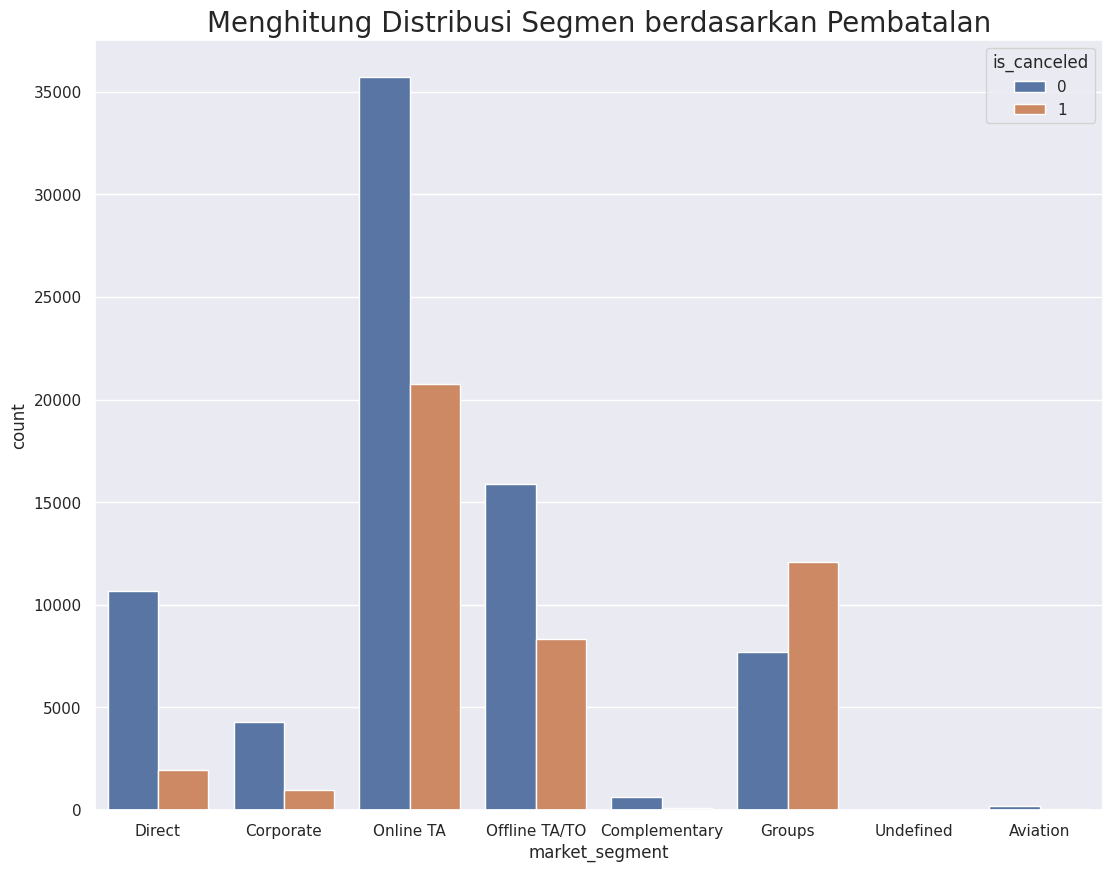

In [ ]:
# Membuat sebuah gambar (figure) dengan ukuran 13x10 inci
plt.figure(figsize=(13, 10))

# Mengatur gaya plot menggunakan darkgrid
sns.set(style="darkgrid")

# Menambahkan judul plot
plt.title("Menghitung Distribusi Segmen berdasarkan Pembatalan", fontdict={'fontsize': 20})

# Membuat countplot dengan seaborn untuk membandingkan pembatalan berdasarkan segmen pasar
ax = sns.countplot(x="market_segment", hue='is_canceled', data=df_hotel)

# Menampilkan plot
plt.show()

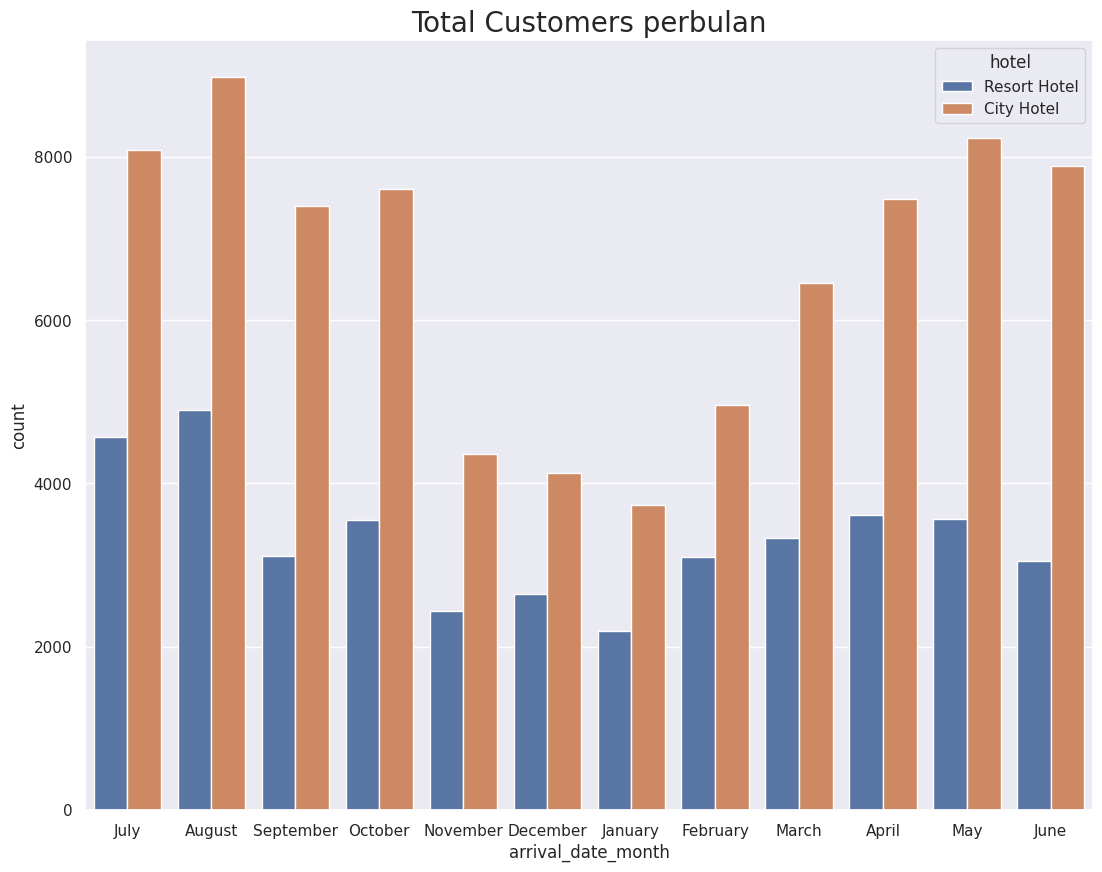

In [ ]:
# Membuat sebuah gambar (figure) dengan ukuran 13x10 inci
plt.figure(figsize=(13, 10))

# Menambahkan judul plot
plt.title("Total Customers perbulan", fontdict={'fontsize': 20})

# Membuat countplot dengan seaborn untuk menghitung total pelanggan per bulan
ax = sns.countplot(x="arrival_date_month", hue='hotel', data=df_hotel)

# Menampilkan plot
plt.show()

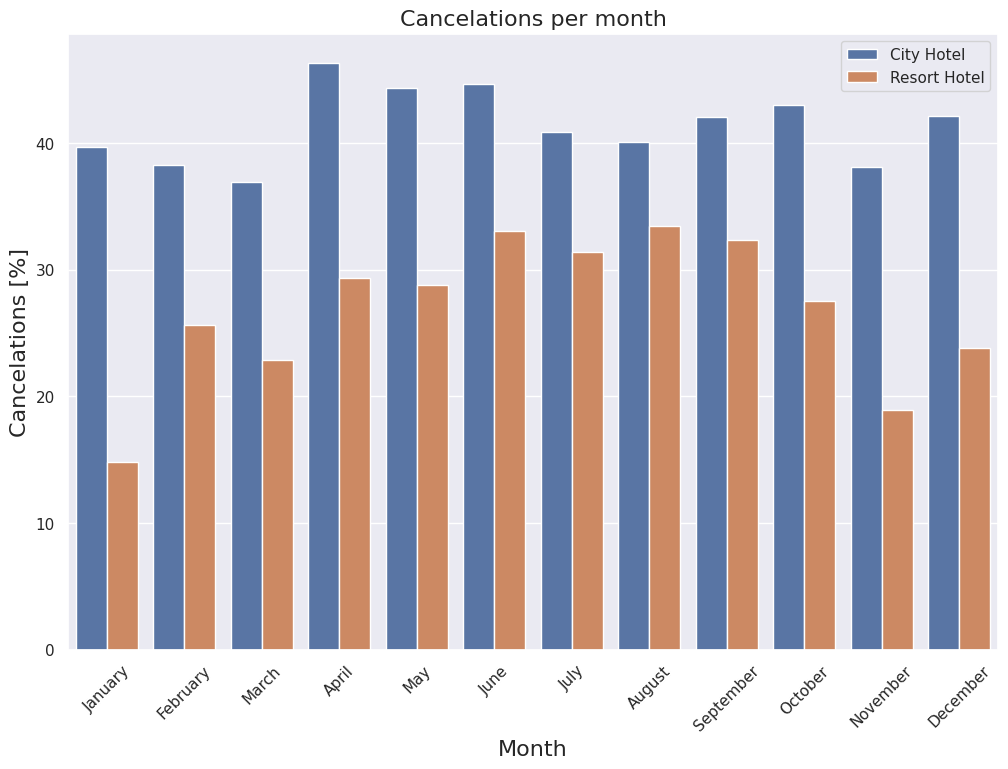

In [ ]:
# Menghitung jumlah pemesanan (booking) dan pembatalan (cancellation) per bulan untuk Resort Hotel
resort_booking = df_hotel.loc[(df_hotel["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = df_hotel.loc[(df_hotel["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

# Menghitung jumlah pemesanan (booking) dan pembatalan (cancellation) per bulan untuk City Hotel
city_booking = df_hotel.loc[(df_hotel["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = df_hotel.loc[(df_hotel["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

# Membuat DataFrame untuk pembatalan hotel Resort
resort_cancel = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(resort_booking.index),
                                "Bookings": list(resort_booking.values),
                                "Cancelations": list(res_cancel_per_month.values)})

# Membuat DataFrame untuk pembatalan hotel City
city_cancel = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(city_booking.index),
                                "Bookings": list(city_booking.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

# Menggabungkan data pembatalan dari kedua hotel
full_cancel_data = pd.concat([resort_cancel, city_cancel], ignore_index=True)

# Menghitung persentase pembatalan (cancelation percentage)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# Mengurutkan data berdasarkan bulan
ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# Menampilkan diagram batang
plt.figure(figsize=(12, 8))
sns.barplot(x="Month", y="cancel_percent", hue="Hotel",
            hue_order=["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

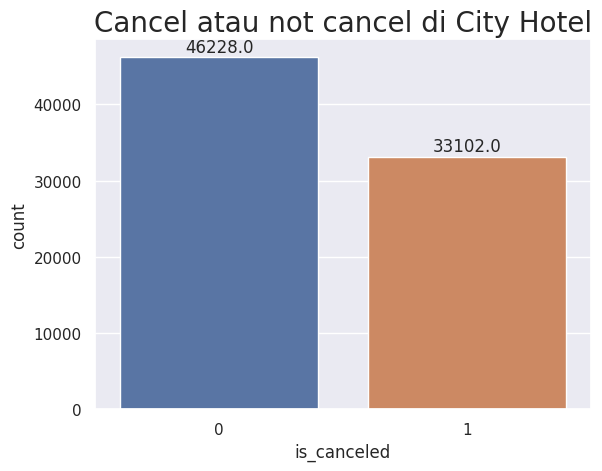

In [ ]:
# Filter data hanya untuk hotel kota (City Hotel)
df_city_hotel = df_hotel[df_hotel['hotel'] == 'City Hotel']

# Menambahkan judul plot
plt.title("Cancel atau not cancel di City Hotel", fontdict={'fontsize': 20})

# Membuat countplot untuk membandingkan pembatalan di City Hotel
ax = sns.countplot(x="is_canceled", data=df_city_hotel)

# Menambahkan label pada setiap batang bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 1), textcoords='offset points')

# Menampilkan plot
plt.show()

<ipython-input-228-698b08cad730>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_hotel['arrival_date_month'] = pd.to_datetime(df_city_hotel['arrival_date_month'], format='%B').dt.month


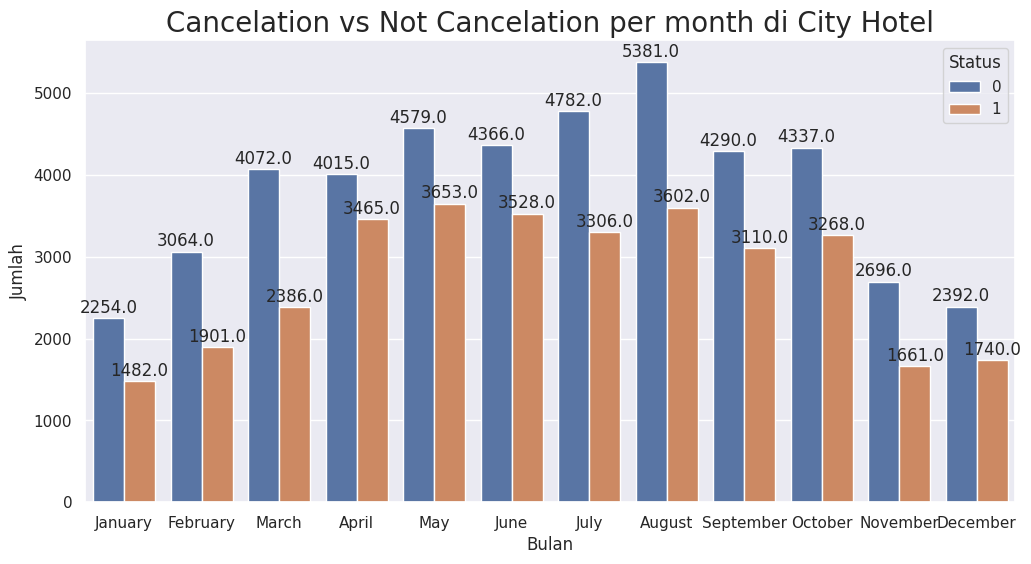

In [ ]:
# Filter data hanya untuk hotel kota (city hotel)
df_city_hotel = df_hotel[df_hotel['hotel'] == 'City Hotel']

# Ekstrak kolom 'arrival_date_month' menjadi bulan
df_city_hotel['arrival_date_month'] = pd.to_datetime(df_city_hotel['arrival_date_month'], format='%B').dt.month

plt.figure(figsize=(12, 6))
plt.title("Cancelation vs Not Cancelation per month di City Hotel", fontdict={'fontsize': 20})
ax = sns.countplot(x="arrival_date_month", hue="is_canceled", data=df_city_hotel)

# Menambahkan label pada tiap batang grafik
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 1), textcoords='offset points')

# Menambahkan label bulan
ax.set_xticklabels (["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"])

plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.legend(title="Status")
plt.show()

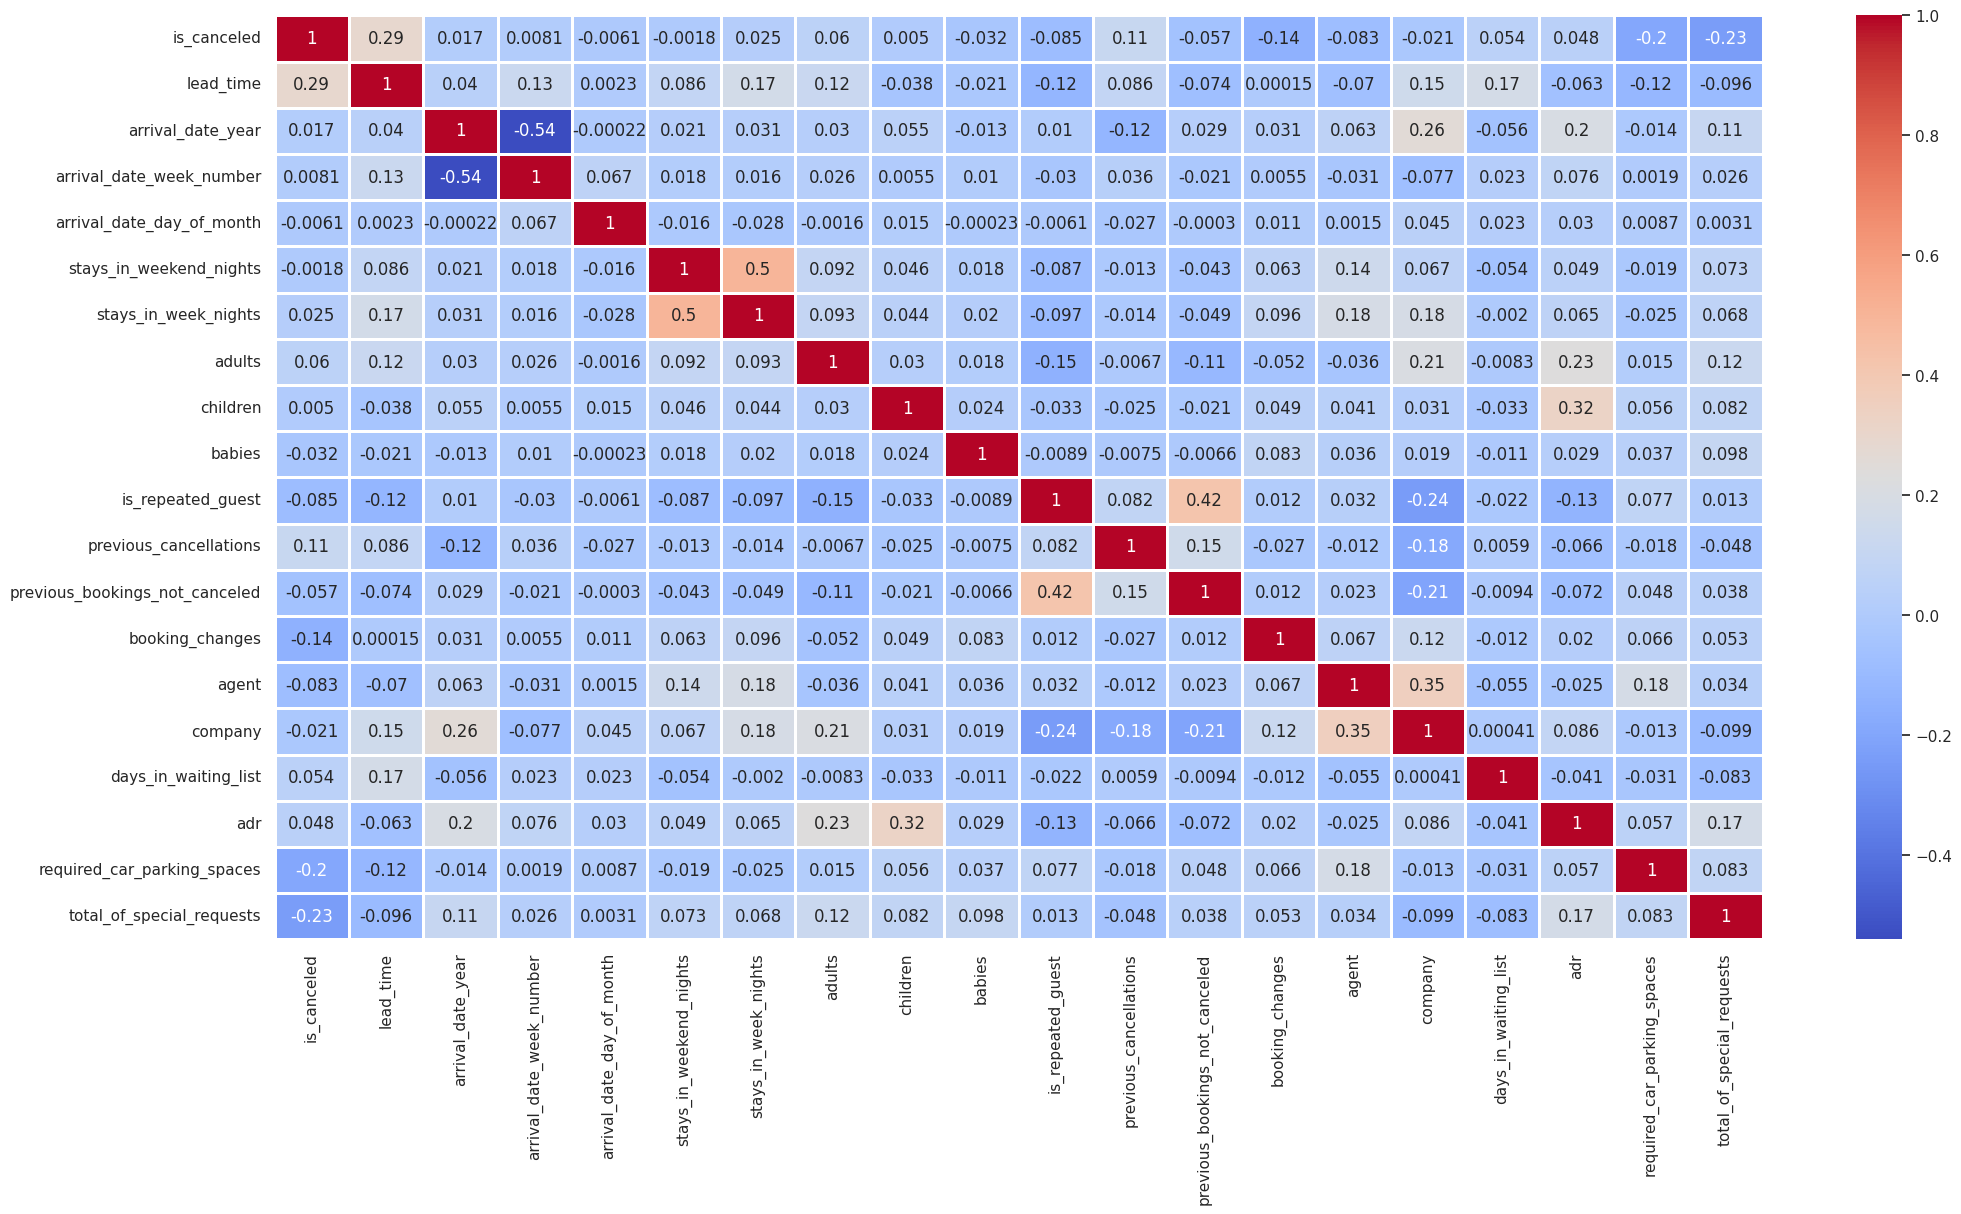

In [ ]:
# Select only numerical columns for correlation calculation
numerical_columns = df_hotel.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numerical_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(24, 12))
sns.heatmap(corr, annot=True, linewidths=1,cmap='coolwarm')
plt.show()

korelasi tertinggi stay in weekend night dan stay in week night, tetapi karena weekend night dan week night tidak menyebabkan hubungan sebab akibat. Maka terpilih korelasi yang kedua, yaitu is_repeaed_guest dan previouse_booking_not_canceled

# **DATA CLEANING**

In [ ]:
df_hotel_clean = df_hotel.copy()
df_hotel_clean.shape

(119390, 32)

In [ ]:
df_hotel_clean = df_hotel_clean.drop('company', axis=1)

In [ ]:
df_hotel_clean = df_hotel_clean.drop('agent', axis=1)

In [ ]:
nan_pengganti = {"country": "Unknown"}
df_hotel_clean = df_hotel_clean.fillna(nan_pengganti)

In [ ]:
df_hotel_clean["meal"].replace("Undefined", "SC", inplace=True)

BB - Bed and Breakfast: This meal plan typically includes accommodation and breakfast as part of the room rate. Guests are provided with breakfast during their stay.

FB - Full Board: This meal plan includes accommodation as well as three meals a day (breakfast, lunch, and dinner) as part of the room rate. Guests receive all their meals at the hotel.

HB - Half Board: Half Board includes accommodation, breakfast, and one other meal, usually dinner or lunch, as part of the room rate. Guests can choose between breakfast and either lunch or dinner.

SC - Self-Catering: In a Self-Catering arrangement, guests have accommodation but are responsible for their own meals. These hotels typically provide kitchen facilities in the rooms or apartments, allowing guests to cook their own meals.

In [ ]:
df_hotel_clean.dropna(subset=['children'], inplace=True)

In [ ]:
import calendar
from datetime import datetime

# Map from month to season (for Northern hemisphere)
seasons = {
    'Winter': ['December', 'January', 'February'],
    'Spring': ['March', 'April', 'May'],
    'Summer': ['June', 'July', 'August'],
    'Autumn': ['September', 'October', 'November']
}

# Function to map a month to a season
def month_to_season(month):
    for season, months in seasons.items():
        if month in months:
            return season

# Create 'season' column
df_hotel_clean['season'] = df_hotel_clean['arrival_date_month'].apply(month_to_season)

# Create 'day_of_week' column
df_hotel_clean['date'] = df_hotel_clean.apply(lambda row: datetime.strptime(f"{int(row['arrival_date_year'])} {row['arrival_date_month']} {int(row['arrival_date_day_of_month'])}", "%Y %B %d"), axis=1)
df_hotel_clean['day_of_week'] = df_hotel_clean['date'].dt.day_name()

# Drop the 'date' column as we no longer need it
df_hotel_clean = df_hotel_clean.drop(columns=['date'])

In [ ]:
df_hotel_clean.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df_hotel_clean.shape

(119386, 32)

# **Remove Outliers**

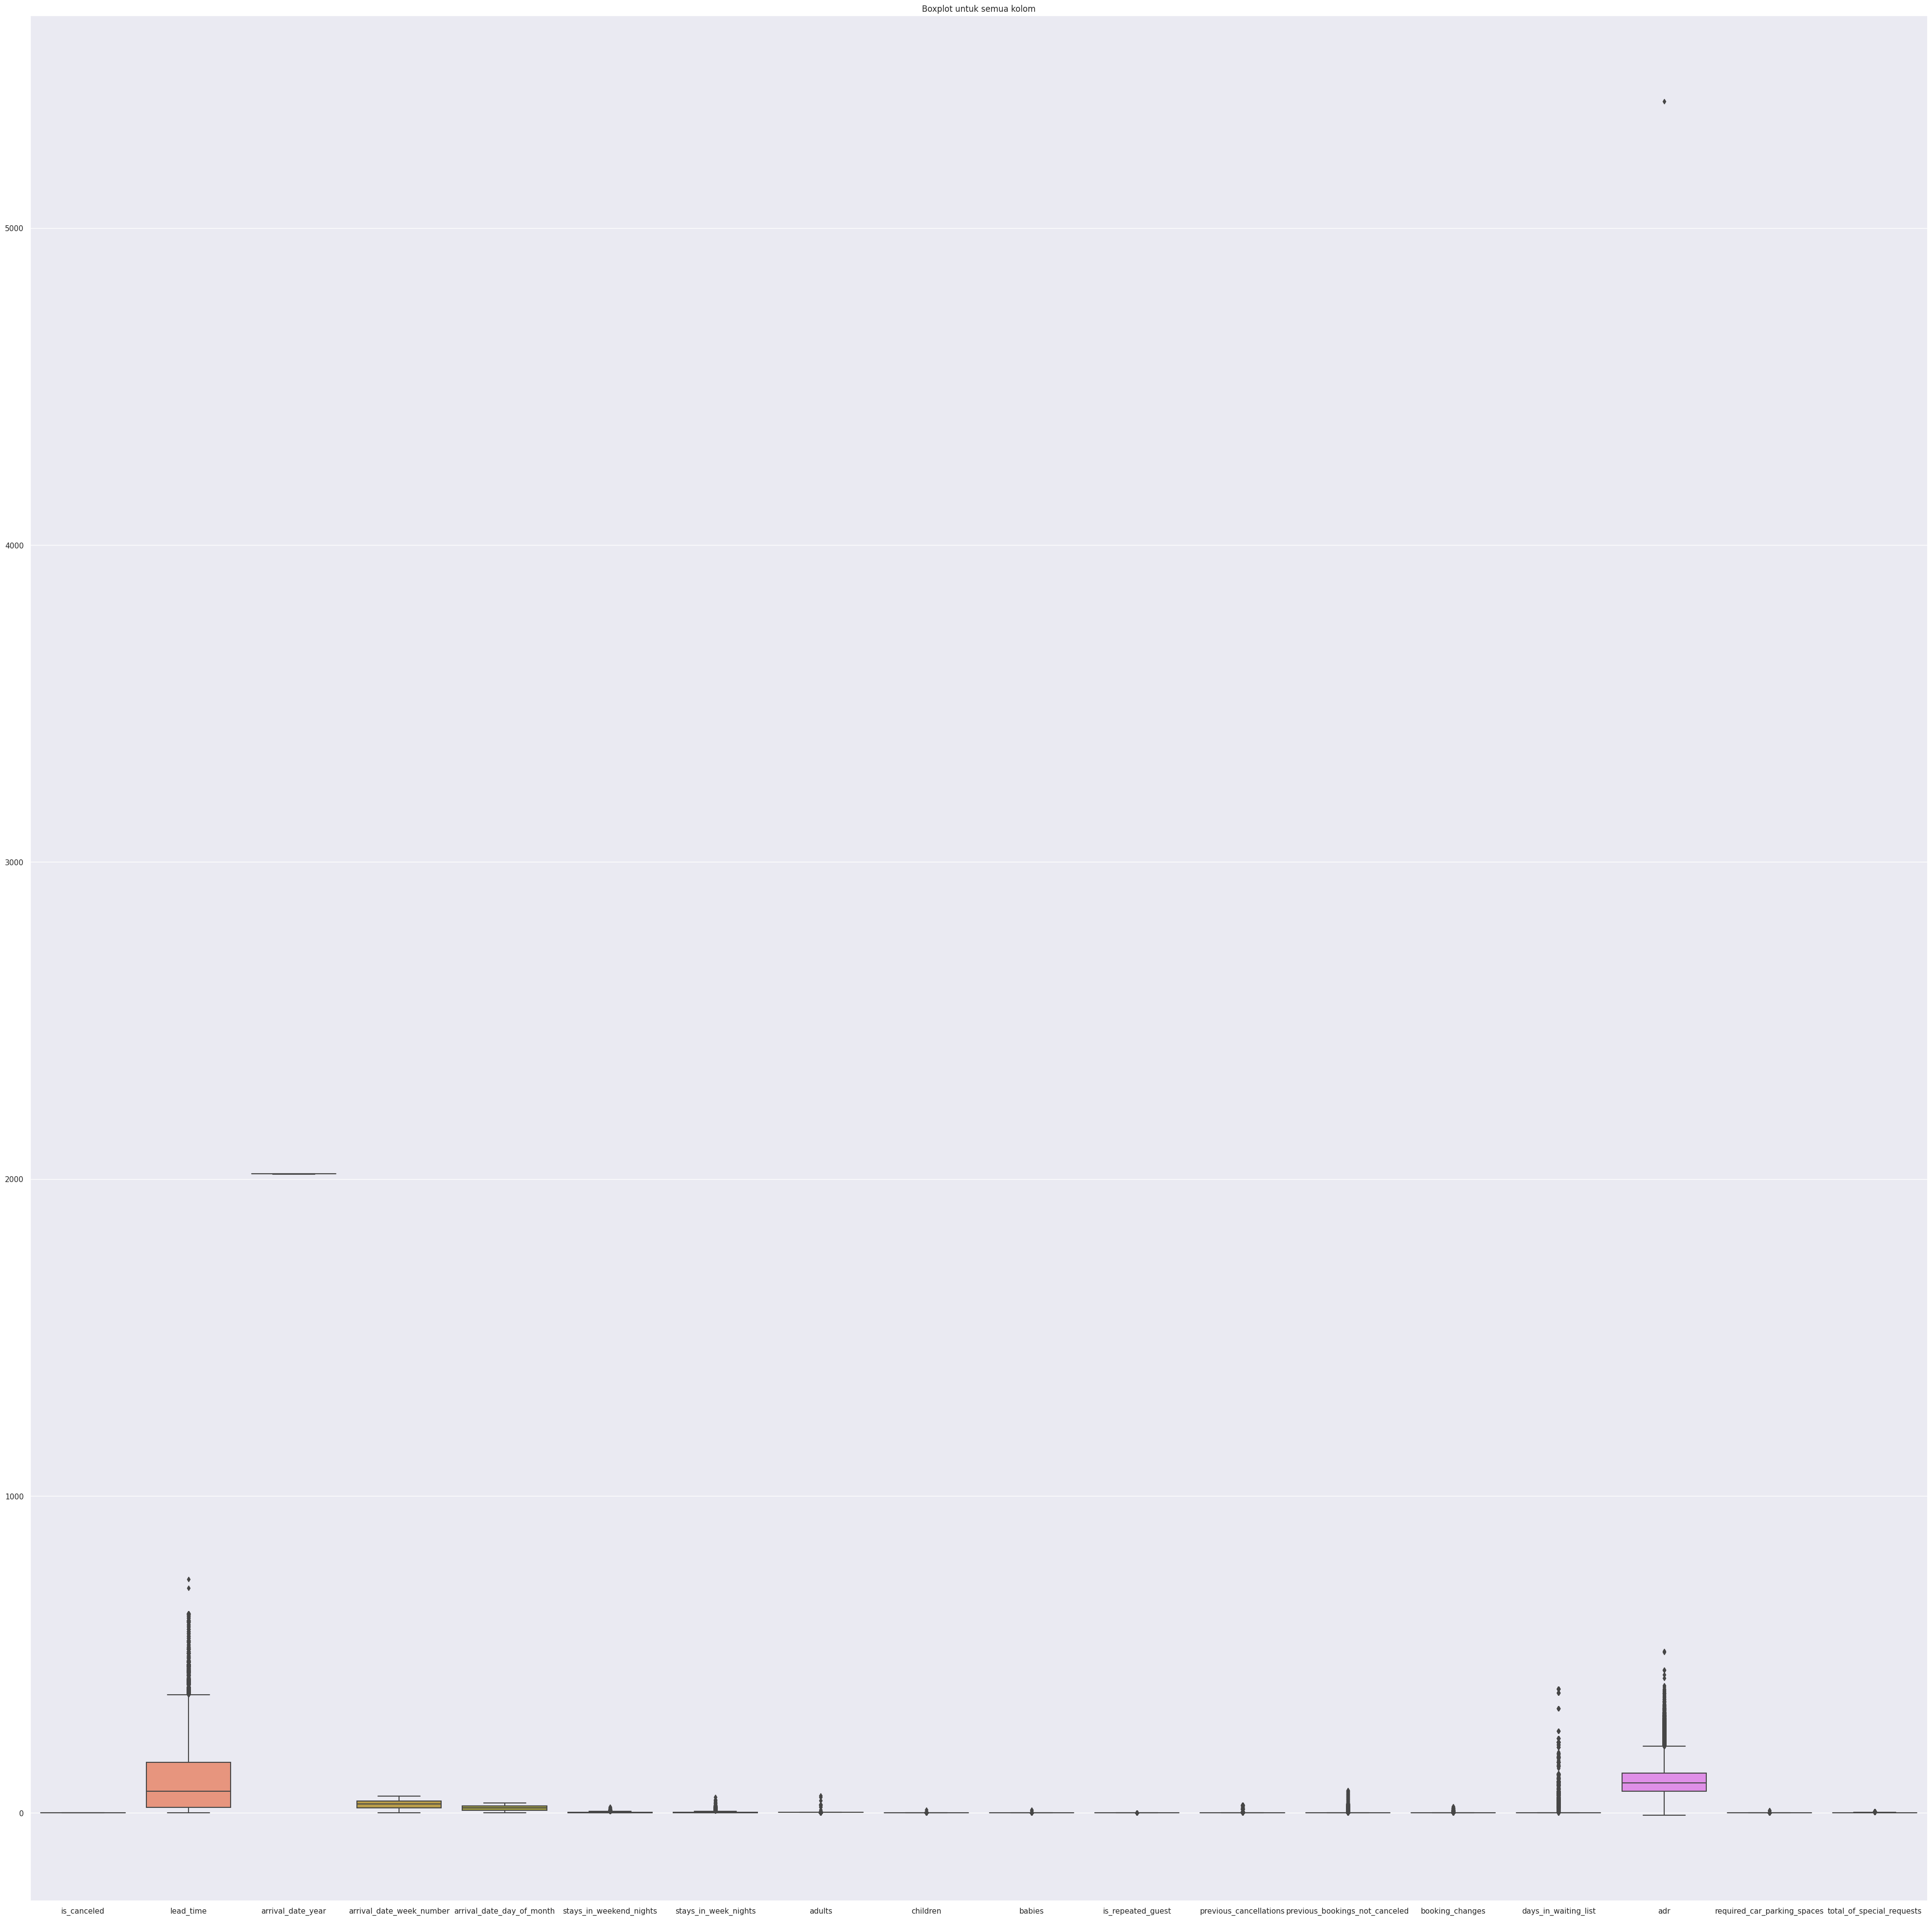

In [ ]:
plt.figure(figsize=(50,50))
sns.boxplot(data=df_hotel_clean)
plt.title("Boxplot untuk semua kolom")
plt.show()

In [ ]:
#describe() digunakan untuk menampilkan deskriptif statistik data.
#Hanya kolom yang bertipe numerik yang akan äitampilkan statistiknya.
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Fungsi untuk menghapus outlier dalam kolom tertentu
def outlierremoval(column):
    # Menghitung kuartil pertama (Q1)
    Q1 = column.quantile(0.25)
    # Menghitung kuartil ketiga (Q3)
    Q3 = column.quantile(0.75)
    # Menghitung Rentang Interkuartil (IQR)
    IQR = Q3 - Q1
    # Mengidentifikasi outlier berdasarkan aturan IQR
    outlier = ((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR)))
    # Mencetak jumlah baris yang dihapus
    print("Number of rows removed: ", df_hotel_clean[outlier].shape[0])
    return outlier

# Daftar kolom numerik yang akan dihapus outlier-nya
num_col = ['lead_time','stays_in_weekend_nights','babies', 'previous_cancellations','stays_in_week_nights', 'previous_bookings_not_canceled','booking_changes', 'required_car_parking_spaces', 'total_of_special_requests','adr','children']

# Melakukan penghapusan outlier untuk setiap kolom dalam daftar num_col
for c in num_col:
    print("Processing column:", c)
    # Memanggil fungsi outlierremoval untuk menghapus outlier dalam kolom tertentu
    df_hotel_clean = df_hotel_clean[~outlierremoval(df_hotel_clean[c])]
    # Mencetak jumlah baris setelah penghapusan outlier
    print("Number of rows after outlier removal: ", df_hotel_clean.shape[0], "\n")

Processing column: lead_time
Number of rows removed:  3005
Number of rows after outlier removal:  116381 

Processing column: stays_in_weekend_nights
Number of rows removed:  262
Number of rows after outlier removal:  116119 

Processing column: babies
Number of rows removed:  915
Number of rows after outlier removal:  115204 

Processing column: previous_cancellations
Number of rows removed:  6276
Number of rows after outlier removal:  108928 

Processing column: stays_in_week_nights
Number of rows removed:  2962
Number of rows after outlier removal:  105966 

Processing column: previous_bookings_not_canceled
Number of rows removed:  2892
Number of rows after outlier removal:  103074 

Processing column: booking_changes
Number of rows removed:  15572
Number of rows after outlier removal:  87502 

Processing column: required_car_parking_spaces
Number of rows removed:  4833
Number of rows after outlier removal:  82669 

Processing column: total_of_special_requests
Number of rows removed

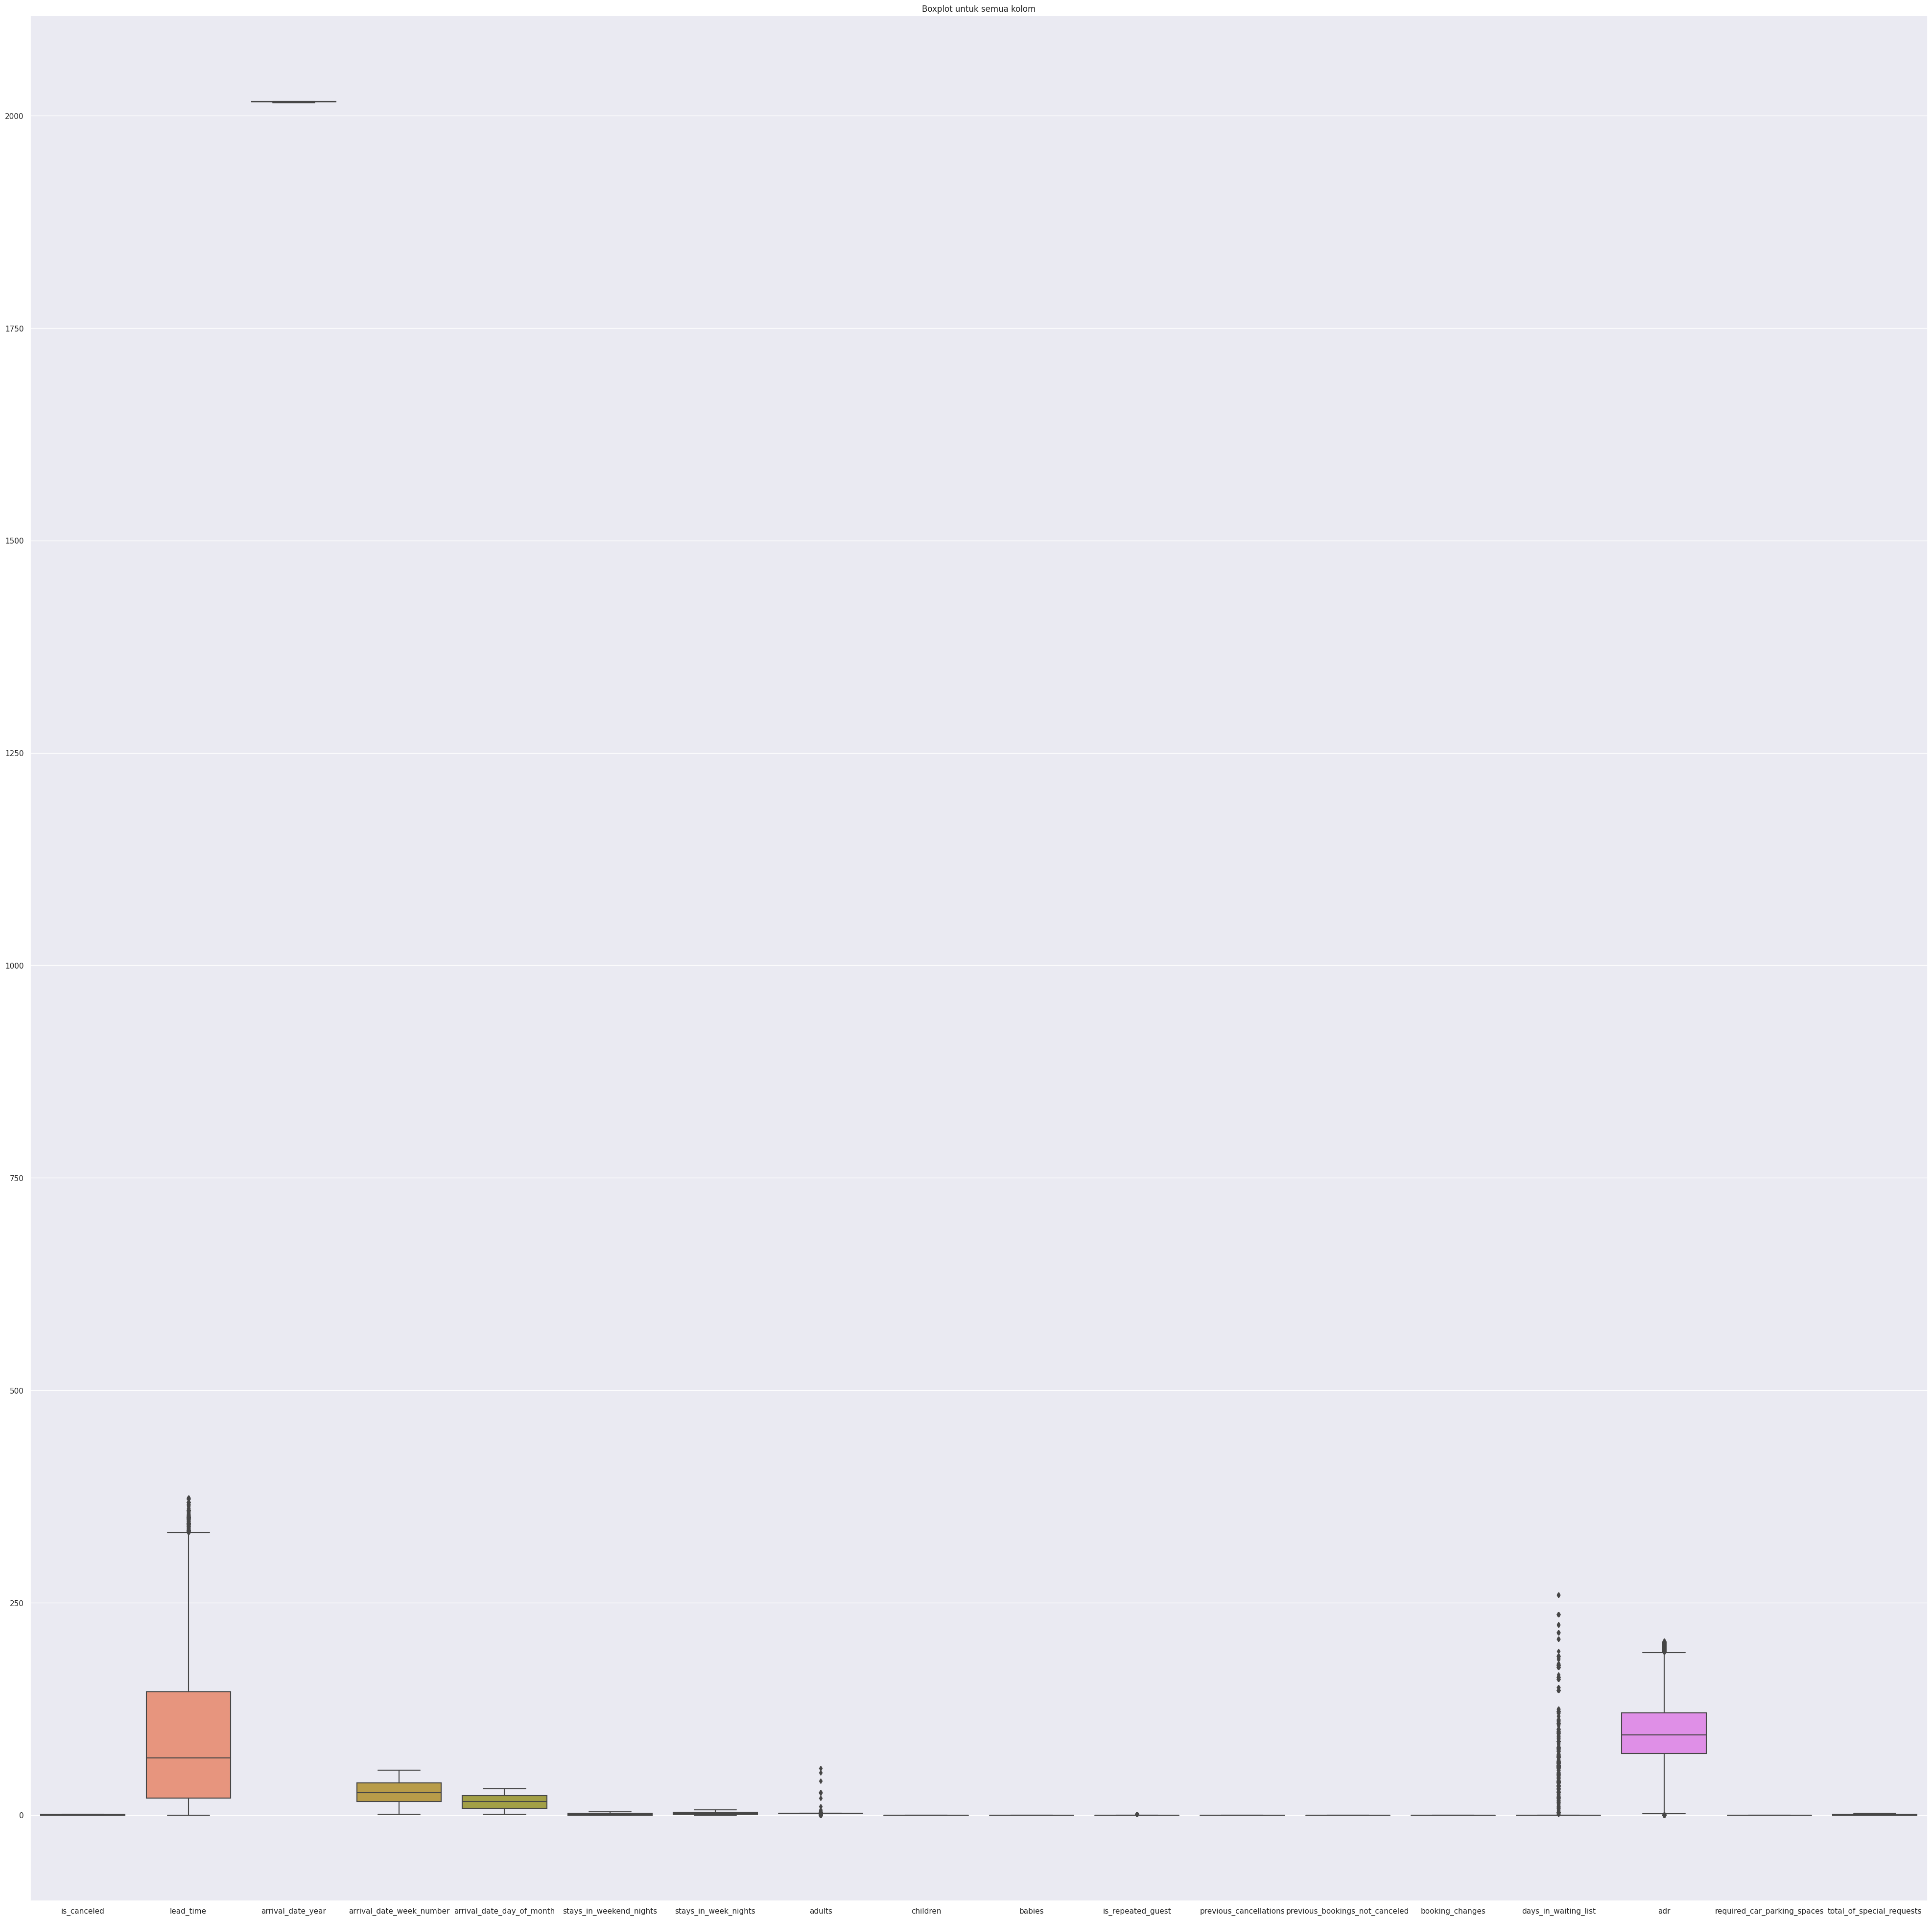

In [ ]:
plt.figure(figsize=(50,50))
sns.boxplot(data=df_hotel_clean)
plt.title("Boxplot untuk semua kolom")
plt.show()

In [ ]:
df_hotel_clean.shape

(73945, 32)

In [ ]:
#Changing date column type to datetime64
df_hotel_clean['reservation_status_date'] = pd.to_datetime(df_hotel_clean['reservation_status_date'])

In [ ]:
df_hotel_clean['reservation_status_date'] = df_hotel_clean['reservation_status_date'].dt.strftime('%d/%m/%Y')

In [ ]:
df_hotel_clean.meal.value_counts(normalize=True)

BB    0.766475
SC    0.129407
HB    0.097721
FB    0.006397
Name: meal, dtype: float64

**Reserved Room type**

In [ ]:
df_hotel_clean.reserved_room_type.value_counts(normalize=True)

A    0.763446
D    0.175211
E    0.043613
F    0.008128
B    0.004855
G    0.002772
C    0.001420
H    0.000338
P    0.000149
L    0.000068
Name: reserved_room_type, dtype: float64

**Assigned Room type**

In [ ]:
df_hotel_clean.assigned_room_type.value_counts(normalize=True)

A    0.676043
D    0.222111
E    0.053783
F    0.014294
B    0.012645
C    0.010346
G    0.005369
I    0.002137
K    0.002015
H    0.001109
P    0.000149
Name: assigned_room_type, dtype: float64

In [ ]:
df_hotel_clean.deposit_type.value_counts(normalize=True)

No Deposit    0.874758
Non Refund    0.124241
Refundable    0.001001
Name: deposit_type, dtype: float64

In [ ]:
# Undersampling
major = df_hotel_clean[df_hotel_clean['is_canceled']==0]
minor = df_hotel_clean[df_hotel_clean['is_canceled']==1]

major_downsampling = major.sample(n=len(minor), random_state=42)

df_hotel_clean = pd.concat([major_downsampling, minor]).sample(frac=1, random_state=42)

df_hotel_clean.shape

(58258, 32)

In [ ]:
label_encoder = LabelEncoder()

df_hotel_clean['hotel'] = label_encoder.fit_transform(df_hotel_clean['hotel'])
df_hotel_clean.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [ ]:
# Create dummy variables for categorical columns
country_dummies = pd.get_dummies(df_hotel_clean['country'])
distribution_channel_dummies = pd.get_dummies(df_hotel_clean['distribution_channel'])
assigned_room_type_dummies = pd.get_dummies(df_hotel_clean['assigned_room_type'])
deposit_type_dummies = pd.get_dummies(df_hotel_clean['deposit_type'])

# Concatenate the dummy variables to the original DataFrame
df_hotel_clean = pd.concat([df_hotel_clean, country_dummies], axis=1)
df_hotel_clean = pd.concat([df_hotel_clean, distribution_channel_dummies], axis=1)
df_hotel_clean = pd.concat([df_hotel_clean, assigned_room_type_dummies], axis=1)
df_hotel_clean = pd.concat([df_hotel_clean, deposit_type_dummies], axis=1)

# Drop the original categorical columns from the DataFrame
df_hotel_clean.drop(['country', 'distribution_channel', 'assigned_room_type', 'deposit_type'], axis=1, inplace=True)

df_hotel_clean.dtypes

hotel                  int64
is_canceled            int64
lead_time              int64
arrival_date_year      int64
arrival_date_month    object
                       ...  
K                      uint8
P                      uint8
No Deposit             uint8
Non Refund             uint8
Refundable             uint8
Length: 200, dtype: object

In [ ]:
df_hotel_clean.to_csv('Clean_hotel_bookings.csv', index=False)